## Linear regression

The linear regression model assumes a linear dependence on parameters $w_0$, $w_1$, ..., $w_m$ between the attributes $X_1$, $X_2$, ..., $X_m$ and the target variable $y$ of the form $$y = w_0 + w_1X_1 + w_2X_2 + \ldots + w_mX_m$$ 

In this part, the problem of univariate linear regression with the model $f(x) = w_0 + w_1x$ will be considered.

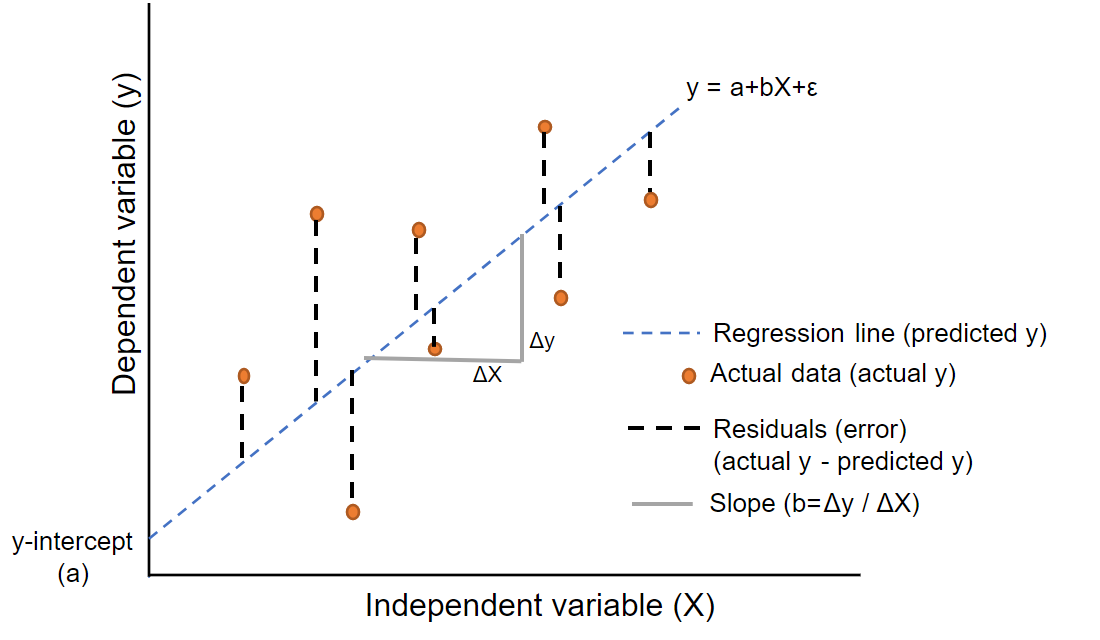

The aim of the example is to recall the basic concepts and APIs of the library itself, which will be used in further work.

### scikit-learn 

[scikit-learn](https://scikit-learn.org/) is a Python library specifically used for machine learning tasks. `linear_model` is a module that provides methods for working with linear models such as linear regression, linear regression with regularizations, logistic regression and others. `model_selection` is a module that has functionalities such as dividing a data set into training and testing sets, cross-validation... The` metrics` module provides various metrics that can be used in evaluation.

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
np.random.seed(7)

<br>
The data set we will be working with will be synthetic. The values of the attributes will be divisions of the equidistant grid on the interval [1, 5], and the values of the objective function will be generated by the formula $ y = 10x + 2\sin (x) $ with the addition of noise.

`N` is a variable that will represent the size of the data set.

In [3]:
N = 100

Next, we will generate the values of the `x` attribute and the values of the target variable` y` and show a dependency graph.

In [ ]:
# the reshape part refers to the creation of the Nx1 vector
x = np.linspace(1, 5, N).reshape(N, 1)

In [ ]:
y = 11*np.sin(x) + 1.5* np.random.randn(N, 1)

In [ ]:
plt.title('Dataset')
plt.plot(x, y, 'o')
plt.show()

Since the goal is to determine the $\beta_0 $ and $\beta_1 $, i.e., linear regression parameters that correspond to a given data set, the following function will help us calculate the value of the target variable of the models learned in this way.

In [ ]:
def f(b0, b1, x):
    return b0+b1*x

The `train_test_split` method is used to divide a data set into a training set and a test set. The ratio of these sets is determined by the parameters `train_size` or` test_size`. These parameters are expressed by values from 0 to 1 and represent the percentage of the specified set. For example, assigning `test_size = 0.4` indicates that 40% of the data will be used for testing and 60% for training. As this division into training and testing sets is random, the `random_state` parameter can be used to control the division. This type of control is important to us because of the reproduction of experiments.

The data set we are working with will be divided in a scale of 60:40.

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=7)

### Creating the model

We use the `LinearRegression` method to create a linear regression model. By default, the free term $\beta_0 $ is associated with the model. If it is necessary to omit it, the parameter `fit_intercept` of the constructor function can be set to the value` False`.

In [ ]:
model = linear_model.LinearRegression()

The `fit` function is used to train the model. Training is done over a training set.

In [ ]:
model.fit(x_train, y_train)

After training, we can read the coefficients of the model and the value of the free member via the parameters `coef_` and` intercept_`.

In [ ]:
type(model.coef_)

In [ ]:
model.coef_.shape

In [ ]:
b1 = model.coef_[0][0]
b1

In [ ]:
type(model.intercept_)

In [ ]:
model.intercept_.shape

In [ ]:
b0 = model.intercept_[0]
b0

We will draw a graph of the model obtained in this way.

In [ ]:
plt.title('Linear regression model')
plt.plot(x, y, 'o')
plt.plot(x, f(b0, b1, x))
plt.show()

### Predicting values by using the learned model

The `predict` function can be used to predict the value of the target variable over new instances. For individual predictions, its argument should be in the form of a column vector.

In [ ]:
model.predict(np.array([23]).reshape(-1, 1))

### Model evaluation

To evaluate regression models, we can use the coefficient of determination, the standard error, or the mean absolute error. The root mean square and the mean absolute error are expressed in terms of the size of the target variable, while the value of the coefficient of determination is normalized. To compute each of the values, we need the exact values of the target variable and the model prediction for the same set of instances.

#### Coefficient of determination $R^2$
    
$R^2 = 1 - \frac{\sum_i{(y_i-\hat{y_i})^2}}{\sum_i{(y_i - \bar{y})^2}}$

The values of the coefficient of determination are from the interval ${(-\infty, 1]}$ and the values closer to $1$ denote the "better" models.

In [ ]:
def r_squared(y_true, y_predicted):
    u = ((y_true - y_predicted)**2).sum()
    
    y_mean = y_true.mean(); 
    v = ((y_true - y_mean)**2).sum()
    
    return 1 - u/v

#### Mean squared error $MSE$: 
    
$MSE = \frac{1}{n} \sum_i{(y_i-\hat{y_i})^2}$

In [ ]:
def mean_squared_error(y_true, y_predicted):
    
    return ((y_true - y_predicted)**2).mean();

We will generate predictions of the training set model.

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_predicted)

In [ ]:
r_squared(y_test, y_predicted)

Equivalents of these functions, with some additional settings, are also available through the `metrics` package. The mean square error is calculated by the `mean_squared_error` function, and the coefficient of determination by the` r2_score` function.

In [ ]:
mse = metrics.mean_squared_error(y_test, y_predicted)
mse

In [ ]:
r2 = metrics.r2_score(y_test, y_predicted)
r2

Another function that can calculate the value of the coefficient of determination is the `score` method of the model itself.

In [ ]:
model.score(x_test, y_test)